In [1]:
from LdaMalletHandler import LdaMalletHandler
import os
import matplotlib.pylab as plt
# The purpose of this script is only to demonstrate my LdaMalletHandler usage
# Note that you must have a Loader and a Preprocessor to use this code entirely
import Loader
from PreProcessor import Preprocessor

In [4]:
saved_model_name = "FolhaCompleto100t_1000i"

if os.getcwd().split('/')[2] == 'alex':
    lda = LdaMalletHandler(mallet_path='/Users/alex/mallet-2.0.8/bin/mallet')
    mallet_path='/Users/alex/mallet-2.0.8/bin/mallet'
else:
    lda = LdaMalletHandler(mallet_path='/Users/marcosdiniz/Documents/UnB/FSI/ProjetoFinal/mallet-2.0.8/bin/mallet')
    mallet_path='/Users/marcosdiniz/Documents/UnB/FSI/ProjetoFinal/mallet-2.0.8/bin/mallet'

    
corpus_path = "data/Folhacompleto/"
corpus = Loader.load_from_folder(corpus_path)

### Loading saved model

In [5]:
lda = LdaMalletHandler(mallet_path=mallet_path)
lda.load_model(saved_model_name)

In [8]:
all_topics = lda.get_string_topics()
all_topics[63]

'senna piloto prova corrida ano equipe carro brasileiro mundial ayrton'

In [9]:
def distriTemp(topic_number, num):
    '''
    topic_number: número do tópico a ser usado
    num: número de tópicos
    '''
    dates = []
    most_repr = lda.n_most_representative(topic_number,n=num)
    for n_doc in most_repr:
        dAux = corpus['dates'][n_doc]
        year = dAux.year
        month = dAux.month
        day = dAux.day
        dates.append([year, month, day])
    return dates

In [10]:
def lista2dict(listaDates):
    months = [1,2,3,4,5,6,7,8,9,10,11,12]
    dicio94 = {}
    dicio95 = {}
    for date in listaDates:
        if date[0] == 1994:
            if date[1] in dicio94:
                dicio94[date[1]] += 1
            else:
                dicio94[date[1]] = 1
        else:
            if date[1] in dicio95:
                dicio95[date[1]] += 1
            else:
                dicio95[date[1]] = 1
    return dicio94, dicio95

In [27]:
def plot(dict1, dict2):
    
    name1 ='Topico #'+ str(topic_number) + ': '+ all_topics[topic_number] + '\n1994'  
    name2 = '1995'
    
    lists1 = sorted(dict1.items())
    lists2 = sorted(dict2.items())
    
    x1, y1 = zip(*lists1)
    x2, y2 = zip(*lists2)

    yrange = max(y1+y2)
    
    plt.figure(figsize=(8,4))
    plt.bar(x1, y1)
    plt.xlabel('MÊS')
    plt.xticks(x1)
    plt.ylabel('NÚMERO DE NOTÍCIAS')
    plt.ylim(top=yrange+10)
    #plt.yticks(y1)
    plt.title(name1)
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.bar(x2, y2)
    plt.xlabel('MÊS')
    plt.xticks(x2)
    plt.ylabel('NÚMERO DE NOTÍCIAS')
    plt.ylim(top=yrange+10)
    #plt.yticks(y2)
    plt.title(name2)
    plt.show()

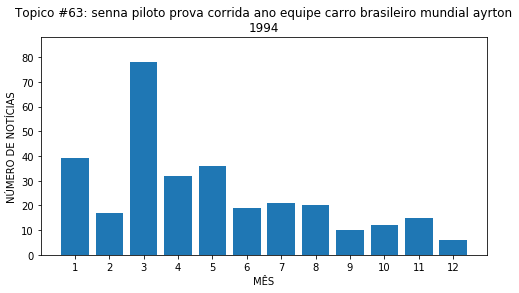

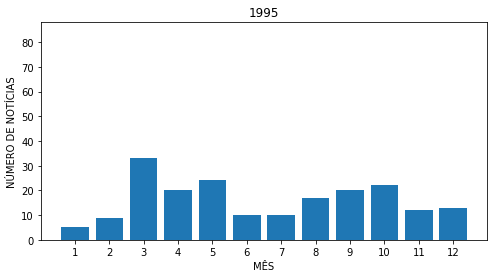

In [28]:
topic_number = 63
num = 500
d1, d2 = lista2dict(distriTemp(topic_number, num))
plot(d1, d2)

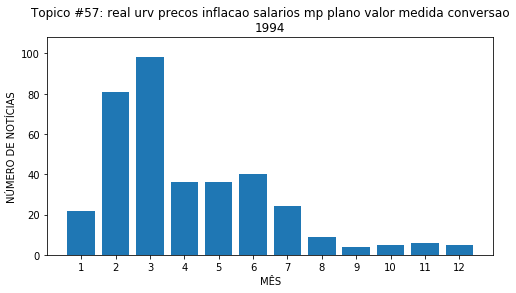

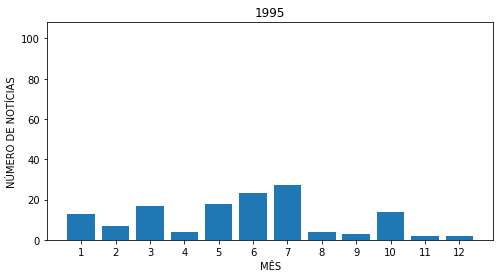

In [29]:
topic_number = 57
num = 500
d1, d2 = lista2dict(distriTemp(topic_number, num))
plot(d1, d2)